**Finding the bottleneck unit or process of the  machine**

Process time is the length of a particular process movement, and handing time is the amount of time required to set up for the next process of the machine

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import bson
import pymongo
from pymongo import MongoClient

In [4]:
#pip install bson
#pip install pymongo

In [5]:
client=MongoClient('localhost' ,27017)

In [6]:
df = pd.read_csv('ProcessEgg_UnitProcedure.csv')

#process_handling_cycle time_ for execute,Aborted,Stopped state

#Import multiple CSV files into pandas and concatenate into one DataFrame
import os
import glob
path = "C:/Users/HLQ/Documents/jupyter/EGSS/Procedures/Process Egg Analysis All/UP_data2/UP_EAS_csv"
allFiles = glob.glob(os.path.join(path,"*.csv"))


dataframes_list_1 = []
for file_ in allFiles:
    #df3 = pd.read_csv(file_,index_col=None, header=0)
    df1 = pd.read_csv(file_,index_col=0)

    dataframes_list_1.append(df1)

In [7]:
#process_handling_cycle time_Aborted state
#Import multiple CSV files into pandas and concatenate into one DataFrame
path = "C:/Users/HLQ/Documents/jupyter/EGSS/Procedures/Process Egg Analysis All/UP_data2/UP_A_csv"
allFiles = glob.glob(os.path.join(path,"*.csv"))


dataframes_list_2 = []
for file_ in allFiles:
    #df3 = pd.read_csv(file_,index_col=None, header=0)
    df2 = pd.read_csv(file_,index_col=0)

    dataframes_list_2.append(df2)

In [8]:
dataframes_list_1[0].head()

,topic,TimeStamp,contextId,commandState,commandKey,caller,elementType,result,duration,executer,date,TimeStamp_start,commandState_e,result_e,process time,process time_s,handling time,handling time_s,cycle time_s
0,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:36.002,2022-11-16-12:10:43.103_19,Completed,Lift Products,Product lifter,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:28.592,execute,0,0 days 00:00:07.410000,7.410,NaN,NaN,NaN
1,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:27.492,2022-11-16-12:10:34.573_18,Completed,Lift Products,Product lifter,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:20.065,execute,0,0 days 00:00:07.427000,7.427,0 days 00:00:01.100000,1.100,8.527
2,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:17.612,2022-11-16-12:10:24.663_17,Completed,Lift Products,Product lifter,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:10.202,execute,0,0 days 00:00:07.410000,7.410,0 days 00:00:02.453000,2.453,9.863
3,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:09.102,2022-11-16-12:10:10.573_16,Completed,Lift Products,Product lifter,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:01.792,execute,0,0 days 00:00:07.310000,7.310,0 days 00:00:01.100000,1.100,8.410
4,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:10:59.362,2022-11-16-12:10:00.763_14,Completed,Lift Products,Product lifter,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:10:52.023,execute,0,0 days 00:00:07.339000,7.339,0 days 00:00:02.430000,2.430,9.769


In [9]:
dataframes_list_1[1].head()

,topic,TimeStamp,contextId,commandState,commandKey,caller,elementType,result,duration,executer,date,TimeStamp_start,commandState_e,result_e,process time,process time_s,handling time,handling time_s,cycle time_s
0,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:36.002,2022-11-16-12:10:34.573_18,Completed,Measure products,Product measurer,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:28.592,execute,0,0 days 00:00:07.410000,7.410,NaN,NaN,NaN
1,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:27.492,2022-11-16-12:10:24.663_17,Completed,Measure products,Product measurer,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:18.712,execute,0,0 days 00:00:08.780000,8.780,0 days 00:00:01.100000,1.1,9.880
2,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:17.612,2022-11-16-12:10:10.573_16,Completed,Measure products,Product measurer,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:10.202,execute,0,0 days 00:00:07.410000,7.410,0 days 00:00:01.100000,1.1,8.510
3,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:09.102,2022-11-16-12:10:00.763_14,Completed,Measure products,Product measurer,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:00.462,execute,0,0 days 00:00:08.640000,8.640,0 days 00:00:01.100000,1.1,9.740
4,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:10:59.362,2022-11-16-12:09:52.314_13,Completed,Measure products,Product measurer,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:10:52.023,execute,0,0 days 00:00:07.339000,7.339,0 days 00:00:01.100000,1.1,8.439


In [10]:
dataframes_list_1[2].head()

,topic,TimeStamp,contextId,commandState,commandKey,caller,elementType,result,duration,executer,date,TimeStamp_start,commandState_e,result_e,process time,process time_s,handling time,handling time_s,cycle time_s
0,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:30.842,2022-11-16-12:10:24.663_17,Completed,Position Products,Product positioner,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:28.592,execute,0,0 days 00:00:02.250000,2.25,NaN,NaN,NaN
1,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:20.962,2022-11-16-12:10:10.573_16,Completed,Position Products,Product positioner,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:18.712,execute,0,0 days 00:00:02.250000,2.25,0 days 00:00:07.630000,7.630,9.880
2,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:12.402,2022-11-16-12:10:00.763_14,Completed,Position Products,Product positioner,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:10.202,execute,0,0 days 00:00:02.200000,2.20,0 days 00:00:06.310000,6.310,8.510
3,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:11:02.602,2022-11-16-12:09:52.314_13,Completed,Position Products,Product positioner,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:00.462,execute,0,0 days 00:00:02.140000,2.14,0 days 00:00:07.600000,7.600,9.740
4,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:10:52.103,2022-11-16-12:09:42.474_12,Aborted,Position Products,Product positioner,Unit Procedure,-60000037,0,NaN,2022-11-16,2022-11-16 12:10:52.023,execute,0,0 days 00:00:00.080000,0.08,0 days 00:00:08.359000,8.359,8.439


In [11]:
dataframes_list_1[3].head()

,topic,TimeStamp,contextId,commandState,commandKey,caller,elementType,result,duration,executer,date,TimeStamp_start,commandState_e,result_e,process time,process time_s,handling time,handling time_s,cycle time_s
0,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:29.792,2022-11-16-12:10:10.573_16,Completed,Punch Products,Product puncher,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:28.592,execute,0,0 days 00:00:01.200000,1.200,NaN,NaN,NaN
1,brix/Procedures/Process eggs/2022-11-16-12:10:...,2022-11-16 12:11:19.895,2022-11-16-12:10:00.763_14,Completed,Punch Products,Product puncher,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:18.712,execute,0,0 days 00:00:01.183000,1.183,0 days 00:00:08.697000,8.697,9.880
2,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:11:11.382,2022-11-16-12:09:52.314_13,Completed,Punch Products,Product puncher,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:10.202,execute,0,0 days 00:00:01.180000,1.180,0 days 00:00:07.330000,7.330,8.510
3,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:11:00.542,2022-11-16-12:09:42.474_12,Aborted,Punch Products,Product puncher,Unit Procedure,-60000037,0,NaN,2022-11-16,2022-11-16 12:11:00.462,execute,0,0 days 00:00:00.080000,0.080,0 days 00:00:09.660000,9.660,9.740
4,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:10:53.193,2022-11-16-12:09:34.704_11,Completed,Punch Products,Product puncher,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:10:52.023,execute,0,0 days 00:00:01.170000,1.170,0 days 00:00:07.269000,7.269,8.439


In [12]:
dataframes_list_1[4].head()

,topic,TimeStamp,contextId,commandState,commandKey,caller,elementType,result,duration,executer,date,TimeStamp_start,commandState_e,result_e,process time,process time_s,handling time,handling time_s,cycle time_s
0,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:11:29.092,2022-11-16-12:09:24.794_10,Completed,Glue Products,Product gluer,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:28.592,execute,0,0 days 00:00:00.500000,0.50,NaN,NaN,NaN
1,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:11:19.202,2022-11-16-12:09:16.364_9,Completed,Glue Products,Product gluer,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:18.712,execute,0,0 days 00:00:00.490000,0.49,0 days 00:00:09.390000,9.390,9.880
2,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:11:10.692,2022-11-16-12:09:06.614_8,Completed,Glue Products,Product gluer,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:10.202,execute,0,0 days 00:00:00.490000,0.49,0 days 00:00:08.020000,8.020,8.510
3,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:11:00.952,2022-11-16-12:08:58.085_7,Completed,Glue Products,Product gluer,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:00.462,execute,0,0 days 00:00:00.490000,0.49,0 days 00:00:09.250000,9.250,9.740
4,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:10:52.513,2022-11-16-12:08:49.115_5,Completed,Glue Products,Product gluer,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:10:52.023,execute,0,0 days 00:00:00.490000,0.49,0 days 00:00:07.949000,7.949,8.439


In [13]:
dataframes_list_1[5].head()

,topic,TimeStamp,contextId,commandState,commandKey,caller,elementType,result,duration,executer,date,TimeStamp_start,commandState_e,result_e,process time,process time_s,handling time,handling time_s,cycle time_s
0,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:11:34.432,2022-11-16-12:09:16.364_9,Completed,Unlift Products,Product unlifter,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:28.592,execute,0,0 days 00:00:05.840000,5.84,NaN,NaN,NaN
1,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:11:24.512,2022-11-16-12:09:06.614_8,Completed,Unlift Products,Product unlifter,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:18.712,execute,0,0 days 00:00:05.800000,5.80,0 days 00:00:04.080000,4.080,9.880
2,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:11:16.022,2022-11-16-12:08:58.085_7,Completed,Unlift Products,Product unlifter,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:10.202,execute,0,0 days 00:00:05.820000,5.82,0 days 00:00:02.690000,2.690,8.510
3,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:11:06.272,2022-11-16-12:08:49.115_5,Completed,Unlift Products,Product unlifter,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:11:00.462,execute,0,0 days 00:00:05.810000,5.81,0 days 00:00:03.930000,3.930,9.740
4,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:10:48.883,2022-11-16-12:08:29.885_4,Completed,Unlift Products,Product unlifter,Unit Procedure,2147483647,0,NaN,2022-11-16,2022-11-16 12:10:43.063,execute,0,0 days 00:00:05.820000,5.82,0 days 00:00:11.579000,11.579,17.399


In [14]:
df

,Unit procedure
0,Lift Products
1,Measure products
2,Position Products
3,Punch Products
4,Glue Products
5,Unlift Products


'''
Bottleneck : process step with longest cycle time <br>
process time high= Measure products , Lift products <br>
Waiting time for next process(handling time)<br>
handling time high = Glue products,Punch products, Position producrs <br>
'''

In [19]:
# Drop first 8 rows
#Lift = Lift.drop([Lift.index[0], Lift.index[1]])
Lift = dataframes_list_1[0].iloc[9: , :]
Lift = Lift.reset_index()
Lift=Lift.drop(['index'], axis=1)
Lift.head() 
#Extracting Multiple columns and rename
Lift1=Lift.drop(columns=['commandKey','caller','elementType','result','duration','executer','result_e','process time','handling time'])
# colomn name change
Lift1=Lift1.rename({'TimeStamp':'TimeStamp_Lift' , 'TimeStamp_start':'TimeStamp_Lift_start', 'process time_s':'process time_Lift',
                    'handling time_s':'handling time_Lift', 'cycle time_s':'cycle time_Lift'}, axis=1)
Lift1.head()

,topic,TimeStamp_Lift,contextId,commandState,date,TimeStamp_Lift_start,commandState_e,process time_Lift,handling time_Lift,cycle time_Lift
0,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:10:09.423,2022-11-16-12:09:16.364_9,Completed,2022-11-16,2022-11-16 12:10:02.083,execute,7.340,1.10,8.440
1,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:09:59.623,2022-11-16-12:09:06.614_8,Completed,2022-11-16,2022-11-16 12:09:52.264,execute,7.359,2.46,9.819
2,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:51.164,2022-11-16-12:08:58.085_7,Completed,2022-11-16,2022-11-16 12:09:43.764,execute,7.400,1.10,8.500
3,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:41.334,2022-11-16-12:08:49.115_5,Completed,2022-11-16,2022-11-16 12:09:34.664,execute,6.670,2.43,9.100
4,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:23.654,2022-11-16-12:08:29.885_4,Completed,2022-11-16,2022-11-16 12:09:16.324,execute,7.330,11.01,18.340


In [20]:
# Drop first n rows
Measure = dataframes_list_1[1].iloc[8: , :]
Measure = Measure.reset_index()
Measure=Measure.drop(['index'], axis=1)
Measure.head()
#Extracting Multiple columns and rename
Measure1=Measure[['TimeStamp','TimeStamp_start','process time_s','handling time_s','cycle time_s']]
Measure1=Measure1.rename({'TimeStamp':'TimeStamp_Measure' , 'TimeStamp_start':'TimeStamp_Measure_start', 'process time_s':'process time_Measure',
                    'handling time_s':'handling time_Measure', 'cycle time_s':'cycle time_Measure'}, axis=1)
Measure1.head()

,TimeStamp_Measure,TimeStamp_Measure_start,process time_Measure,handling time_Measure,cycle time_Measure
0,2022-11-16 12:10:18.013,2022-11-16 12:10:10.523,7.490,6.61,14.100
1,2022-11-16 12:10:09.423,2022-11-16 12:10:00.723,8.700,1.10,9.800
2,2022-11-16 12:09:59.623,2022-11-16 12:09:52.264,7.359,1.10,8.459
3,2022-11-16 12:09:51.164,2022-11-16 12:09:42.434,8.730,1.10,9.830
4,2022-11-16 12:09:33.564,2022-11-16 12:09:24.754,8.810,8.87,17.680


In [21]:
# Drop first n rows
Position = dataframes_list_1[2].iloc[7: , :]
Position = Position.reset_index()
Position=Position.drop(['index'], axis=1)
Position.head()

#Extracting Multiple columns and rename
Position1=Position[['TimeStamp','TimeStamp_start','process time_s','handling time_s','cycle time_s']]
Position1=Position1.rename({'TimeStamp':'TimeStamp_Position' , 'TimeStamp_start':'TimeStamp_Position_start', 'process time_s':'process time_Position',
                    'handling time_s':'handling time_Position', 'cycle time_s':'cycle time_Position'}, axis=1)
Position1.head()

,TimeStamp_Position,TimeStamp_Position_start,process time_Position,handling time_Position,cycle time_Position
0,2022-11-16 12:10:26.883,2022-11-16 12:10:24.623,2.26,7.640,9.900
1,2022-11-16 12:10:12.693,2022-11-16 12:10:10.523,2.17,11.930,14.100
2,2022-11-16 12:10:02.913,2022-11-16 12:10:00.723,2.19,7.610,9.800
3,2022-11-16 12:09:54.364,2022-11-16 12:09:52.264,2.10,6.359,8.459
4,2022-11-16 12:09:36.764,2022-11-16 12:09:34.664,2.10,15.500,17.600


In [22]:
# Drop first n rows
Punch = dataframes_list_1[3].iloc[6: , :]
Punch = Punch.reset_index()
Punch=Punch.drop(['index'], axis=1)
Punch.head()
#Extracting Multiple columns and rename
Punch1=Punch[['TimeStamp','TimeStamp_start','process time_s','handling time_s','cycle time_s']]
Punch1=Punch1.rename({'TimeStamp':'TimeStamp_Punch' , 'TimeStamp_start':'TimeStamp_Punch_start', 'process time_s':'process time_Punch',
                    'handling time_s':'handling time_Punch', 'cycle time_s':'cycle time_Punch'}, axis=1)
Punch1.head()


,TimeStamp_Punch,TimeStamp_Punch_start,process time_Punch,handling time_Punch,cycle time_Punch
0,2022-11-16 12:10:35.693,2022-11-16 12:10:34.523,1.17,7.370,8.540
1,2022-11-16 12:10:25.793,2022-11-16 12:10:24.623,1.17,8.730,9.900
2,2022-11-16 12:10:11.693,2022-11-16 12:10:10.523,1.17,12.930,14.100
3,2022-11-16 12:10:01.913,2022-11-16 12:10:00.723,1.19,8.610,9.800
4,2022-11-16 12:09:43.604,2022-11-16 12:09:42.434,1.17,17.119,18.289


In [23]:
# Drop first n rows
Glue = dataframes_list_1[4].iloc[2: , :]
Glue = Glue.reset_index()
Glue=Glue.drop(['index'], axis=1)
Glue.head()

#Extracting Multiple columns and rename
Glue1=Glue[['TimeStamp','TimeStamp_start','process time_s','handling time_s','cycle time_s']]
Glue1=Glue1.rename({'TimeStamp':'TimeStamp_Glue' , 'TimeStamp_start':'TimeStamp_Glue_start', 'process time_s':'process time_Glue',
                    'handling time_s':'handling time_Glue', 'cycle time_s':'cycle time_Glue'}, axis=1)
Glue1.head()
#Glue1.shape

,TimeStamp_Glue,TimeStamp_Glue_start,process time_Glue,handling time_Glue,cycle time_Glue
0,2022-11-16 12:11:10.692,2022-11-16 12:11:10.202,0.49,8.020,8.510
1,2022-11-16 12:11:00.952,2022-11-16 12:11:00.462,0.49,9.250,9.740
2,2022-11-16 12:10:52.513,2022-11-16 12:10:52.023,0.49,7.949,8.439
3,2022-11-16 12:10:35.013,2022-11-16 12:10:34.523,0.49,17.010,17.500
4,2022-11-16 12:10:25.113,2022-11-16 12:10:24.623,0.49,9.410,9.900


In [24]:
# Drop first n rows
Unlift = dataframes_list_1[5].iloc[1: , :]
Unlift = Unlift.reset_index()
Unlift=Unlift.drop(['index'], axis=1)
Unlift.head()

#Unlift=dataframes_list_1[5].copy()
#Unlift.head()

#Extracting Multiple columns and rename
Unlift1=Unlift[['TimeStamp','TimeStamp_start','process time_s','handling time_s','cycle time_s']]
Unlift1=Unlift1.rename({'TimeStamp':'TimeStamp_Unlift' , 'TimeStamp_start':'TimeStamp_Unlift_start', 'process time_s':'process time_Unlift',
                    'handling time_s':'handling time_Unlift', 'cycle time_s':'cycle time_Unlift'}, axis=1)
Unlift1.head()
#Unlift1.shape

,TimeStamp_Unlift,TimeStamp_Unlift_start,process time_Unlift,handling time_Unlift,cycle time_Unlift
0,2022-11-16 12:11:24.512,2022-11-16 12:11:18.712,5.80,4.080,9.880
1,2022-11-16 12:11:16.022,2022-11-16 12:11:10.202,5.82,2.690,8.510
2,2022-11-16 12:11:06.272,2022-11-16 12:11:00.462,5.81,3.930,9.740
3,2022-11-16 12:10:48.883,2022-11-16 12:10:43.063,5.82,11.579,17.399
4,2022-11-16 12:10:40.343,2022-11-16 12:10:34.523,5.82,2.720,8.540


In [25]:
#connect all UnitProcedure 
UnitProcedure = pd.concat([Lift1, Measure1, Position1, Punch1, Glue1, Unlift1], axis="columns")
UnitProcedure.head()

,topic,TimeStamp_Lift,contextId,commandState,date,TimeStamp_Lift_start,commandState_e,process time_Lift,handling time_Lift,cycle time_Lift,...,TimeStamp_Glue,TimeStamp_Glue_start,process time_Glue,handling time_Glue,cycle time_Glue,TimeStamp_Unlift,TimeStamp_Unlift_start,process time_Unlift,handling time_Unlift,cycle time_Unlift
0,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:10:09.423,2022-11-16-12:09:16.364_9,Completed,2022-11-16,2022-11-16 12:10:02.083,execute,7.340,1.10,8.440,...,2022-11-16 12:11:10.692,2022-11-16 12:11:10.202,0.49,8.020,8.510,2022-11-16 12:11:24.512,2022-11-16 12:11:18.712,5.80,4.080,9.880
1,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:09:59.623,2022-11-16-12:09:06.614_8,Completed,2022-11-16,2022-11-16 12:09:52.264,execute,7.359,2.46,9.819,...,2022-11-16 12:11:00.952,2022-11-16 12:11:00.462,0.49,9.250,9.740,2022-11-16 12:11:16.022,2022-11-16 12:11:10.202,5.82,2.690,8.510
2,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:51.164,2022-11-16-12:08:58.085_7,Completed,2022-11-16,2022-11-16 12:09:43.764,execute,7.400,1.10,8.500,...,2022-11-16 12:10:52.513,2022-11-16 12:10:52.023,0.49,7.949,8.439,2022-11-16 12:11:06.272,2022-11-16 12:11:00.462,5.81,3.930,9.740
3,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:41.334,2022-11-16-12:08:49.115_5,Completed,2022-11-16,2022-11-16 12:09:34.664,execute,6.670,2.43,9.100,...,2022-11-16 12:10:35.013,2022-11-16 12:10:34.523,0.49,17.010,17.500,2022-11-16 12:10:48.883,2022-11-16 12:10:43.063,5.82,11.579,17.399
4,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:23.654,2022-11-16-12:08:29.885_4,Completed,2022-11-16,2022-11-16 12:09:16.324,execute,7.330,11.01,18.340,...,2022-11-16 12:10:25.113,2022-11-16 12:10:24.623,0.49,9.410,9.900,2022-11-16 12:10:40.343,2022-11-16 12:10:34.523,5.82,2.720,8.540


In [26]:
#handling time  for the next process(Eg:lift to measure..etc)

In [27]:
UnitProcedure['TimeStamp_Lift']

0        2022-11-16 12:10:09.423
1        2022-11-16 12:09:59.623
2        2022-11-16 12:09:51.164
3        2022-11-16 12:09:41.334
4        2022-11-16 12:09:23.654
                  ...           
17044    2022-11-09 15:12:26.193
17045    2022-11-09 15:12:18.393
17046    2022-11-09 15:12:09.373
17047    2022-11-09 15:12:01.584
17048    2022-11-09 15:10:29.255
Name: TimeStamp_Lift, Length: 17049, dtype: object

In [28]:
UnitProcedure['TimeStamp_Measure_start']

0        2022-11-16 12:10:10.523
1        2022-11-16 12:10:00.723
2        2022-11-16 12:09:52.264
3        2022-11-16 12:09:42.434
4        2022-11-16 12:09:24.754
                  ...           
17044                        NaN
17045                        NaN
17046                        NaN
17047                        NaN
17048                        NaN
Name: TimeStamp_Measure_start, Length: 17049, dtype: object

In [29]:
UnitProcedure1=UnitProcedure

In [30]:
UnitProcedure1['TimeStamp_Lift'] = pd.to_datetime(UnitProcedure1['TimeStamp_Lift'])
UnitProcedure1['TimeStamp_Measure_start'] = pd.to_datetime(UnitProcedure1['TimeStamp_Measure_start'])
UnitProcedure1['TimeStamp_Measure'] = pd.to_datetime(UnitProcedure1['TimeStamp_Measure'])
UnitProcedure1['TimeStamp_Position_start'] = pd.to_datetime(UnitProcedure1['TimeStamp_Position_start'])
UnitProcedure1['TimeStamp_Position'] = pd.to_datetime(UnitProcedure1['TimeStamp_Position'])
UnitProcedure1['TimeStamp_Punch_start'] = pd.to_datetime(UnitProcedure1['TimeStamp_Punch_start'])
UnitProcedure1['TimeStamp_Punch'] = pd.to_datetime(UnitProcedure1['TimeStamp_Punch'])
UnitProcedure1['TimeStamp_Glue_start'] = pd.to_datetime(UnitProcedure1['TimeStamp_Glue_start'])
UnitProcedure1['TimeStamp_Glue'] = pd.to_datetime(UnitProcedure1['TimeStamp_Glue'])
UnitProcedure1['TimeStamp_Unlift_start'] = pd.to_datetime(UnitProcedure1['TimeStamp_Unlift_start'])
#UnitProcedure1['TimeStamp_Unlift'] = pd.to_datetime(UnitProcedure1['TimeStamp_Unlift'])
#UnitProcedure1['TimeStamp_Lift_start'] = pd.to_datetime(UnitProcedure1['TimeStamp_Lift_start'])

In [31]:
################################
#note: need to check handing to next process calculation
#after ID: 2022-11-16-10:53:23.559_173

In [32]:
UnitProcedure1['handling_Lift to Measure']=UnitProcedure1['TimeStamp_Measure_start']-UnitProcedure1['TimeStamp_Lift']
UnitProcedure1['handling_Measure to Position']=UnitProcedure1['TimeStamp_Position_start']-UnitProcedure1['TimeStamp_Measure']
UnitProcedure1['handling_Position to Punch']=UnitProcedure1['TimeStamp_Punch_start']-UnitProcedure1['TimeStamp_Position']
UnitProcedure1['handling_Punch to Glue']=UnitProcedure1['TimeStamp_Glue_start']-UnitProcedure1['TimeStamp_Punch']
UnitProcedure1['handling_Glue to Unlift']=UnitProcedure1['TimeStamp_Unlift_start']-UnitProcedure1['TimeStamp_Glue']
#UnitProcedure1['handling_Unlift to Lift']=UnitProcedure1['TimeStamp_Lift_start'].shift(-1)-UnitProcedure1['TimeStamp_Unlift']



In [33]:
UnitProcedure1.head()

,topic,TimeStamp_Lift,contextId,commandState,date,TimeStamp_Lift_start,commandState_e,process time_Lift,handling time_Lift,cycle time_Lift,...,TimeStamp_Unlift,TimeStamp_Unlift_start,process time_Unlift,handling time_Unlift,cycle time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue,handling_Glue to Unlift
0,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:10:09.423,2022-11-16-12:09:16.364_9,Completed,2022-11-16,2022-11-16 12:10:02.083,execute,7.340,1.10,8.440,...,2022-11-16 12:11:24.512,2022-11-16 12:11:18.712,5.80,4.080,9.880,0 days 00:00:01.100000,0 days 00:00:06.610000,0 days 00:00:07.640000,0 days 00:00:34.509000,0 days 00:00:08.020000
1,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:09:59.623,2022-11-16-12:09:06.614_8,Completed,2022-11-16,2022-11-16 12:09:52.264,execute,7.359,2.46,9.819,...,2022-11-16 12:11:16.022,2022-11-16 12:11:10.202,5.82,2.690,8.510,0 days 00:00:01.100000,0 days 00:00:01.100000,0 days 00:00:11.930000,0 days 00:00:34.669000,0 days 00:00:09.250000
2,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:51.164,2022-11-16-12:08:58.085_7,Completed,2022-11-16,2022-11-16 12:09:43.764,execute,7.400,1.10,8.500,...,2022-11-16 12:11:06.272,2022-11-16 12:11:00.462,5.81,3.930,9.740,0 days 00:00:01.100000,0 days 00:00:01.100000,0 days 00:00:07.610000,0 days 00:00:40.330000,0 days 00:00:07.949000
3,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:41.334,2022-11-16-12:08:49.115_5,Completed,2022-11-16,2022-11-16 12:09:34.664,execute,6.670,2.43,9.100,...,2022-11-16 12:10:48.883,2022-11-16 12:10:43.063,5.82,11.579,17.399,0 days 00:00:01.100000,0 days 00:00:01.100000,0 days 00:00:06.359000,0 days 00:00:32.610000,0 days 00:00:08.050000
4,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:23.654,2022-11-16-12:08:29.885_4,Completed,2022-11-16,2022-11-16 12:09:16.324,execute,7.330,11.01,18.340,...,2022-11-16 12:10:40.343,2022-11-16 12:10:34.523,5.82,2.720,8.540,0 days 00:00:01.100000,0 days 00:00:01.100000,0 days 00:00:05.670000,0 days 00:00:41.019000,0 days 00:00:09.410000


In [34]:
#UnitProcedure1.to_csv("LiftProducts execute_Aborted_Stopped_2023.01.02.csv")

In [35]:
#filter Execute olnly
#filter ['commandState']=="Completed"
UnitProcedure2=UnitProcedure1[UnitProcedure1['commandState']=="Completed"]
UnitProcedure2.head()

,topic,TimeStamp_Lift,contextId,commandState,date,TimeStamp_Lift_start,commandState_e,process time_Lift,handling time_Lift,cycle time_Lift,...,TimeStamp_Unlift,TimeStamp_Unlift_start,process time_Unlift,handling time_Unlift,cycle time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue,handling_Glue to Unlift
0,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:10:09.423,2022-11-16-12:09:16.364_9,Completed,2022-11-16,2022-11-16 12:10:02.083,execute,7.340,1.10,8.440,...,2022-11-16 12:11:24.512,2022-11-16 12:11:18.712,5.80,4.080,9.880,0 days 00:00:01.100000,0 days 00:00:06.610000,0 days 00:00:07.640000,0 days 00:00:34.509000,0 days 00:00:08.020000
1,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:09:59.623,2022-11-16-12:09:06.614_8,Completed,2022-11-16,2022-11-16 12:09:52.264,execute,7.359,2.46,9.819,...,2022-11-16 12:11:16.022,2022-11-16 12:11:10.202,5.82,2.690,8.510,0 days 00:00:01.100000,0 days 00:00:01.100000,0 days 00:00:11.930000,0 days 00:00:34.669000,0 days 00:00:09.250000
2,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:51.164,2022-11-16-12:08:58.085_7,Completed,2022-11-16,2022-11-16 12:09:43.764,execute,7.400,1.10,8.500,...,2022-11-16 12:11:06.272,2022-11-16 12:11:00.462,5.81,3.930,9.740,0 days 00:00:01.100000,0 days 00:00:01.100000,0 days 00:00:07.610000,0 days 00:00:40.330000,0 days 00:00:07.949000
3,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:41.334,2022-11-16-12:08:49.115_5,Completed,2022-11-16,2022-11-16 12:09:34.664,execute,6.670,2.43,9.100,...,2022-11-16 12:10:48.883,2022-11-16 12:10:43.063,5.82,11.579,17.399,0 days 00:00:01.100000,0 days 00:00:01.100000,0 days 00:00:06.359000,0 days 00:00:32.610000,0 days 00:00:08.050000
4,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:23.654,2022-11-16-12:08:29.885_4,Completed,2022-11-16,2022-11-16 12:09:16.324,execute,7.330,11.01,18.340,...,2022-11-16 12:10:40.343,2022-11-16 12:10:34.523,5.82,2.720,8.540,0 days 00:00:01.100000,0 days 00:00:01.100000,0 days 00:00:05.670000,0 days 00:00:41.019000,0 days 00:00:09.410000


In [36]:
dataset_12=UnitProcedure2
dataset_12['handling_Lift to Measure'] = (dataset_12['handling_Lift to Measure']).dt.total_seconds()
dataset_12['handling_Measure to Position'] = (dataset_12['handling_Measure to Position']).dt.total_seconds()
dataset_12['handling_Position to Punch'] = (dataset_12['handling_Position to Punch']).dt.total_seconds()
dataset_12['handling_Punch to Glue'] = (dataset_12['handling_Punch to Glue']).dt.total_seconds()
#dataset_12['handling_Lift to Measure_s'] = (dataset_12['handling_Lift to Measure']).dt.total_seconds()
dataset_12['handling_Glue to Unlift'] = (dataset_12['handling_Glue to Unlift']).dt.total_seconds()

C:\Temp\ipykernel_12996\853148918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_12['handling_Lift to Measure'] = (dataset_12['handling_Lift to Measure']).dt.total_seconds()
C:\Temp\ipykernel_12996\853148918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_12['handling_Measure to Position'] = (dataset_12['handling_Measure to Position']).dt.total_seconds()
C:\Temp\ipykernel_12996\853148918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [37]:
dataset_12.head()

,topic,TimeStamp_Lift,contextId,commandState,date,TimeStamp_Lift_start,commandState_e,process time_Lift,handling time_Lift,cycle time_Lift,...,TimeStamp_Unlift,TimeStamp_Unlift_start,process time_Unlift,handling time_Unlift,cycle time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue,handling_Glue to Unlift
0,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:10:09.423,2022-11-16-12:09:16.364_9,Completed,2022-11-16,2022-11-16 12:10:02.083,execute,7.340,1.10,8.440,...,2022-11-16 12:11:24.512,2022-11-16 12:11:18.712,5.80,4.080,9.880,1.1,6.61,7.640,34.509,8.020
1,brix/Procedures/Process eggs/2022-11-16-12:09:...,2022-11-16 12:09:59.623,2022-11-16-12:09:06.614_8,Completed,2022-11-16,2022-11-16 12:09:52.264,execute,7.359,2.46,9.819,...,2022-11-16 12:11:16.022,2022-11-16 12:11:10.202,5.82,2.690,8.510,1.1,1.10,11.930,34.669,9.250
2,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:51.164,2022-11-16-12:08:58.085_7,Completed,2022-11-16,2022-11-16 12:09:43.764,execute,7.400,1.10,8.500,...,2022-11-16 12:11:06.272,2022-11-16 12:11:00.462,5.81,3.930,9.740,1.1,1.10,7.610,40.330,7.949
3,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:41.334,2022-11-16-12:08:49.115_5,Completed,2022-11-16,2022-11-16 12:09:34.664,execute,6.670,2.43,9.100,...,2022-11-16 12:10:48.883,2022-11-16 12:10:43.063,5.82,11.579,17.399,1.1,1.10,6.359,32.610,8.050
4,brix/Procedures/Process eggs/2022-11-16-12:08:...,2022-11-16 12:09:23.654,2022-11-16-12:08:29.885_4,Completed,2022-11-16,2022-11-16 12:09:16.324,execute,7.330,11.01,18.340,...,2022-11-16 12:10:40.343,2022-11-16 12:10:34.523,5.82,2.720,8.540,1.1,1.10,5.670,41.019,9.410


In [38]:
#dataset_12.to_csv("LiftProducts execute_completed data 2023.01.02.csv")
#dataset_12.to_csv("LiftProducts execute_completed data 2023.01.11.csv") # add handling_Glue to Unlift_

In [39]:
df

,Unit procedure
0,Lift Products
1,Measure products
2,Position Products
3,Punch Products
4,Glue Products
5,Unlift Products


Text(0, 0.5, 'Time Seconds')

<Figure size 2250x750 with 0 Axes>

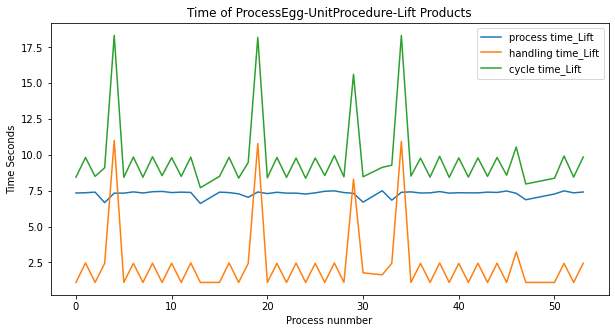

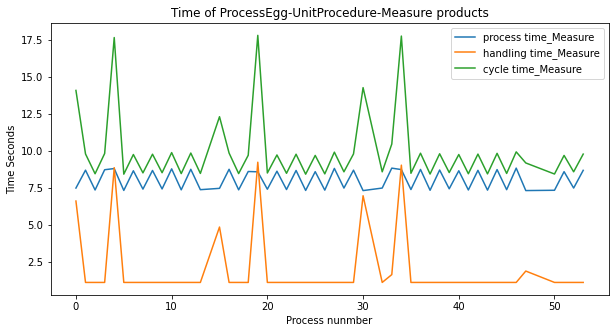

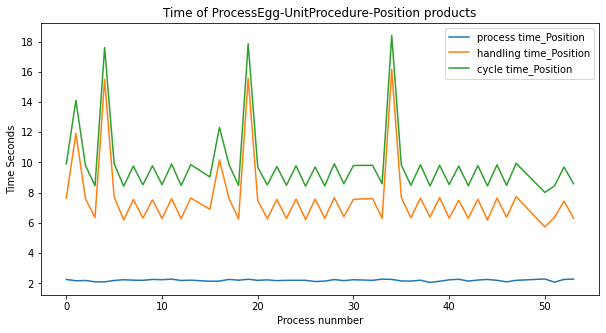

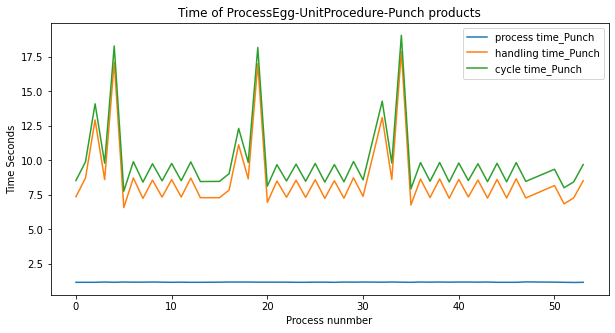

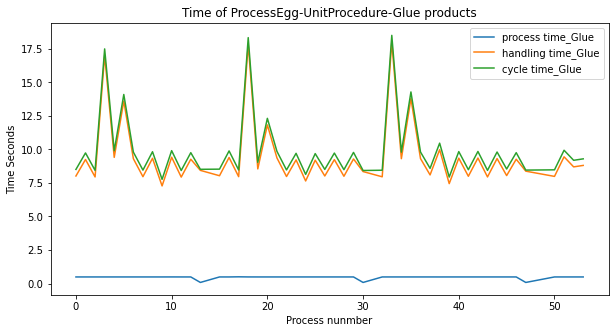

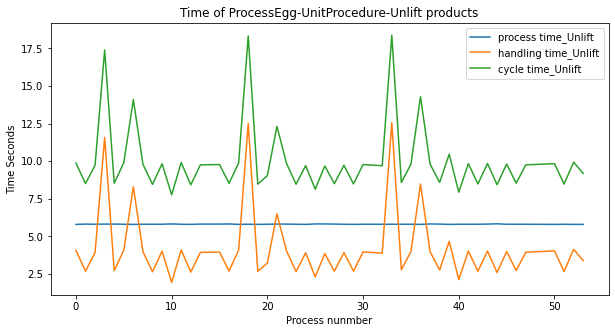

In [40]:
#for UN ,unit in zip(dataframes_list_1, df['Unit procedure']):
UN=UnitProcedure2
# to set the plot size
plt.figure(figsize=(15, 5), dpi=150)
UN=UN.head(50)

#Lift Products
#UN.plot(x="contextId", y=["process time_Lift_s","handling time_Lift_s","cycle time_Lift_s"],figsize=(10, 5))
UN.plot( y=["process time_Lift","handling time_Lift","cycle time_Lift"],figsize=(10, 5))
plt.title("Time of ProcessEgg-UnitProcedure-Lift Products")
#plt.xlabel('contextId')
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')

#Measure products
#UN.plot(x="contextId", y=["process time_Measure_s","handling time_Measure_s","cycle time_Measure_s"],figsize=(10, 5))
UN.plot( y=["process time_Measure","handling time_Measure","cycle time_Measure"],figsize=(10, 5))
plt.title("Time of ProcessEgg-UnitProcedure-Measure products")
#plt.xlabel('contextId')
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')

#Position products
#UN.plot(x="contextId", y=["process time_Position_s","handling time_Position_s","cycle time_Position_s"],figsize=(10, 5))
UN.plot( y=["process time_Position","handling time_Position","cycle time_Position"],figsize=(10, 5))
plt.title("Time of ProcessEgg-UnitProcedure-Position products")
#plt.xlabel('contextId')
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')

#Punch products
#UN.plot(x="contextId", y=["process time_Punch_s","handling time_Punch_s","cycle time_Punch_s"],figsize=(10, 5))
UN.plot( y=["process time_Punch","handling time_Punch","cycle time_Punch"],figsize=(10, 5))
plt.title("Time of ProcessEgg-UnitProcedure-Punch products")
#plt.xlabel('contextId')
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')

#Glue products
#UN.plot(x="contextId", y=["process time_Glue_s","handling time_Glue_s","cycle time_Glue_s"],figsize=(10, 5))
UN.plot( y=["process time_Glue","handling time_Glue","cycle time_Glue"],figsize=(10, 5))
plt.title("Time of ProcessEgg-UnitProcedure-Glue products")
#plt.xlabel('contextId')
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')

#Unlift products
#UN.plot(x="contextId", y=["process time_Unlift_s","handling time_Unlift_s","cycle time_Unlift_s"],figsize=(10, 5))
UN.plot( y=["process time_Unlift","handling time_Unlift","cycle time_Unlift"],figsize=(10, 5))

plt.title("Time of ProcessEgg-UnitProcedure-Unlift products")
#plt.xlabel('contextId')
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')

Bottleneck : process step with longest cycle time <br>
process time high= Measure products , Lift products <br>
Waiting time for next process(handling time)<br>
handling time high = Glue products,Punch products, Position producrs <br>

**Handling time for next process**

Text(0, 0.5, 'Time Seconds')

<Figure size 2250x750 with 0 Axes>

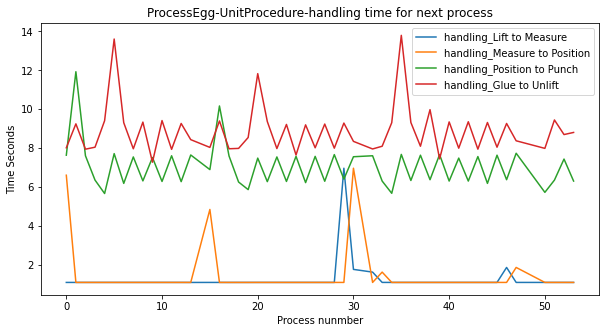

In [45]:
#ProcessEgg-UnitProcedure-handling time for next process
Un_d=UnitProcedure2
Un_d= dataset_12
# to set the plot size
plt.figure(figsize=(15, 5), dpi=150)
Un_d=dataset_12.head(50)
        

Un_d.plot( y=["handling_Lift to Measure","handling_Measure to Position","handling_Position to Punch"
              ,'handling_Glue to Unlift'],figsize=(10, 5))
#Un_d.plot(x="contextId", y=["handling_Lift to Measure","handling_Measure to Position","handling_Position to Punch"],figsize=(10, 5))
plt.title("ProcessEgg-UnitProcedure-handling time for next process")
#plt.xlabel('contextId')
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')

Figure illustrates the handling time analysis of the machine, where the x-axis represents the process number (Data from 50 process phases), and the y-axis displays the duration of each process. The analysis indicates that the position to punch and glue to unlift steps take more time compared to other movements. The handling process involves two main parts; 1) transporting the tray (typically 1 row further) using a chain belt and 2) handling the carriers, which are coupling and decoupling the carrier to and from the chain with trays.
Minor fluctuations in handling times for the glue to unlift and position to punch steps are due to the coupling and decoupling process of the carrier. However, the reason for high variations is unclear.
Further, Figures  show not only the handling time but also the waiting time of a unit until handling will take place. Each unit executes its process, then waits (for all others to finish) and then handling takes place for eggs.

**Actual and Theoretical value handling time**

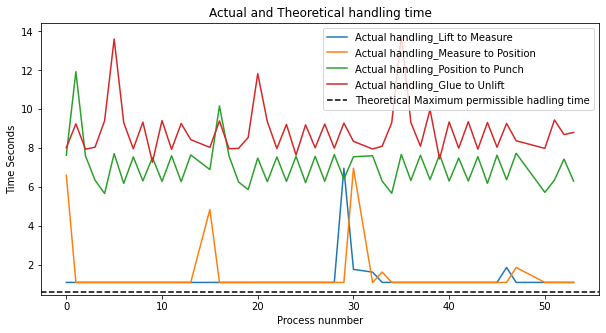

In [61]:
#Actual and Theoretical value handling time

Un_d.plot( y=["handling_Lift to Measure","handling_Measure to Position","handling_Position to Punch"
              ,'handling_Glue to Unlift'],figsize=(10, 5))
#Un_d.plot(x="contextId", y=["handling_Lift to Measure","handling_Measure to Position","handling_Position to Punch"],figsize=(10, 5))
plt.title("Actual and Theoretical handling time")

# specifying horizontal line type
plt.axhline(y = 0.6, color = 'k', linestyle = '--', label ='Theoretical Maximum permissible hadling time')
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')
#plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('Actual handling_Lift to Measure')
L.get_texts()[1].set_text('Actual handling_Measure to Position')
L.get_texts()[2].set_text('Actual handling_Position to Punch')
L.get_texts()[3].set_text('Actual handling_Glue to Unlift')

Figure shows the comparison of actual and theoretical value of the handling time. The theoretical design time (0.6 sec) is what is always needed for handling, but the handling times for glue to unlift and position to punch are significantly higher than the theoretical time due to long waiting times. Additionally, other handling times also appear to be somewhat higher than the theoretical time. 

**Process time duration of each process at the same moment** 

Text(0, 0.5, 'Time Seconds')

<Figure size 2250x750 with 0 Axes>

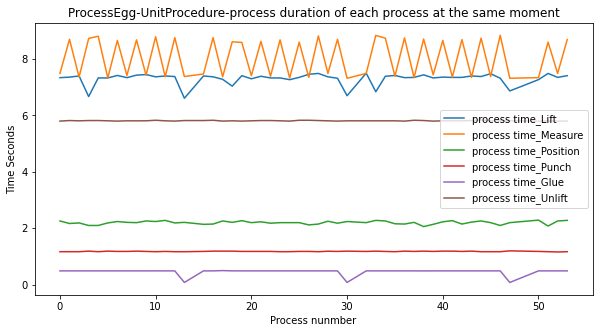

In [48]:
#process duration of each process at the same moment 

# to set the plot size
plt.figure(figsize=(15, 5), dpi=150)
Un_d=UnitProcedure2.head(50)
        
Un_d.plot( y=["process time_Lift","process time_Measure","process time_Position",
                            'process time_Punch','process time_Glue','process time_Unlift'],figsize=(10, 5))
#Un_d.plot(x="contextId", y=["handling_Lift to Measure","handling_Measure to Position","handling_Position to Punch"],figsize=(10, 5))
plt.title("ProcessEgg-UnitProcedure-process duration of each process at the same moment")
#plt.xlabel('contextId')
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')


Figure shows the process time analysis of processEggs unit of the machine. Graph’s x-axis shows the process number (Data from 50 process phases) and the y-axis shows the time duration of the individual process. When compared to other movements, process time measure and process time lift take more time. The measure process, on the other hand, consumes the most process time for the unit.

Further, Figure highlights an unusual fluctuation in the measure process compared to other process units. Upon investigation by both the supervisor and engineering team, recently it was discovered that a PLC code error was the root cause of this abnormality. Subsequently, the team is now working to rectify this error and prevent any further issues. Another point of note is the fluctuation in the process time glue after every 16 steps. This is due to the fact that the egg tray consists of 15 rows, and a new egg tray is used after every 15 rows. In between trays, there is one empty row. This empty row is not glued. As a result, the process time glue shows a predictable fluctuation pattern that repeats after every 15 rows.

Bottleneck : process step with longest cycle time

process time high= Measure products , Lift products

**Actual and Theoretical value process time**

<Figure size 2250x750 with 0 Axes>

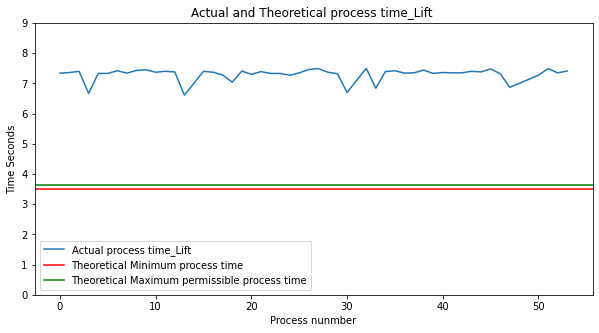

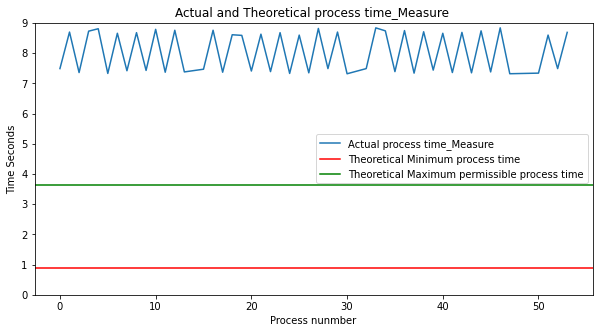

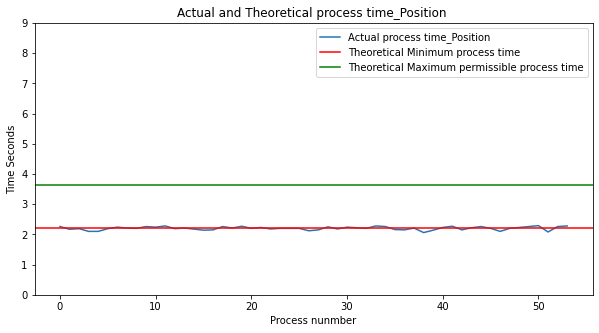

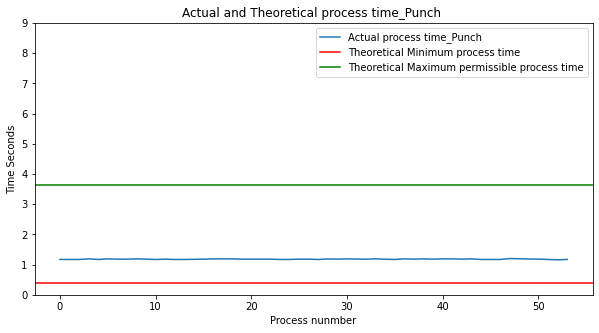

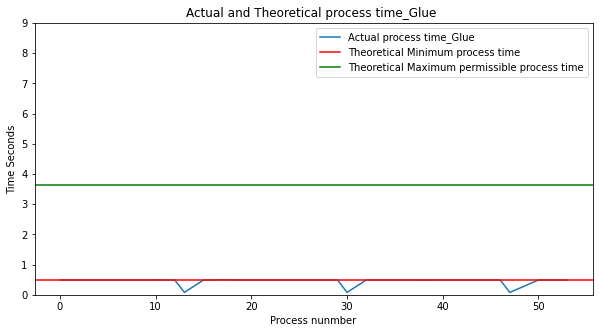

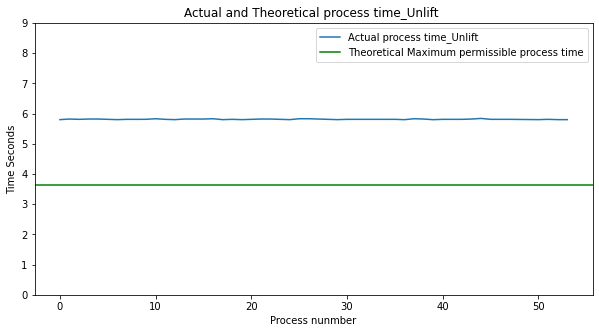

In [63]:
#Actual and Theoretical value process time
#1.process time_Lift
plt.figure(figsize=(15, 5), dpi=150)
Un_d=UnitProcedure2.head(50)
        
Un_d.plot( y=["process time_Lift"],figsize=(10, 5))
plt.title("Actual and Theoretical process time_Lift ")
#plt.xlabel('contextId')
# specifying horizontal line type
plt.axhline(y = 3.5, color = 'r', linestyle = '-', label ='Theoretical Minimum process time')
plt.axhline(y = 3.62, color = 'g', linestyle = '-', label ='Theoretical Maximum permissible process time')

# Set the range of y-axis
plt.ylim(0, 9)
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')
#plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('Actual process time_Lift')

#2.process time_Measure
Un_d.plot( y=["process time_Measure"],figsize=(10, 5))
plt.title("Actual and Theoretical process time_Measure ")
#plt.xlabel('contextId')
# specifying horizontal line type
plt.axhline(y = 0.9, color = 'r', linestyle = '-', label ='Theoretical Minimum process time')
plt.axhline(y = 3.62, color = 'g', linestyle = '-', label ='Theoretical Maximum permissible process time')

# Set the range of y-axis
plt.ylim(0, 9)
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')
#plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('Actual process time_Measure')

#3.process time_Position
Un_d.plot( y=["process time_Position"],figsize=(10, 5))
plt.title("Actual and Theoretical process time_Position ")
#plt.xlabel('contextId')
# specifying horizontal line type
plt.axhline(y = 2.2, color = 'r', linestyle = '-', label ='Theoretical Minimum process time')
plt.axhline(y = 3.62, color = 'g', linestyle = '-', label ='Theoretical Maximum permissible process time')

# Set the range of y-axis
plt.ylim(0, 9)
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')
#plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('Actual process time_Position')

#4.process time_Punch
Un_d.plot( y=["process time_Punch"],figsize=(10, 5))
plt.title("Actual and Theoretical process time_Punch ")
#plt.xlabel('contextId')
# specifying horizontal line type
plt.axhline(y = 0.4, color = 'r', linestyle = '-', label ='Theoretical Minimum process time')
plt.axhline(y = 3.62, color = 'g', linestyle = '-', label ='Theoretical Maximum permissible process time')

# Set the range of y-axis
plt.ylim(0, 9)
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')
#plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('Actual process time_Punch')

#5.process time_Glue
Un_d.plot( y=["process time_Glue"],figsize=(10, 5))
plt.title("Actual and Theoretical process time_Glue ")
#plt.xlabel('contextId')
# specifying horizontal line type
plt.axhline(y = 0.5, color = 'r', linestyle = '-', label ='Theoretical Minimum process time')
plt.axhline(y = 3.62, color = 'g', linestyle = '-', label ='Theoretical Maximum permissible process time')

# Set the range of y-axis
plt.ylim(0, 9)
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')
#plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('Actual process time_Glue')

#6.process time_Unlift
Un_d.plot( y=["process time_Unlift"],figsize=(10, 5))
plt.title("Actual and Theoretical process time_Unlift ")
#plt.xlabel('contextId')
# specifying horizontal line type
#plt.axhline(y = 3.5, color = 'r', linestyle = '-', label ='Theoretical Minimum process time')
plt.axhline(y = 3.62, color = 'g', linestyle = '-', label ='Theoretical Maximum permissible process time')

# Set the range of y-axis
plt.ylim(0, 9)
plt.xlabel('Process nunmber')
plt.ylabel('Time Seconds')
#plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('Actual process time_Unlift')

Figure shows a comparison between the actual and theoretical process time values for different stages of the process. The analysis reveals that the actual process time for lift is higher than its theoretical value. The same is true for the measure stage, which requires significant improvement compared to the theoretical design process time. However, the actual time for position and glue stages is similar to their respective theoretical design process time. The actual process time for the punch stage is higher than its theoretical design value but lower than the theoretical maximum permissible time. Lastly, the unlift stage shows a higher actual process time compared to the theoretical value.

**Conclusions**

As a result, Process time analysis was used to identify the bottleneck unit or process in machine. According to result, the measure process takes the most time in the processEgg unit when compared to other process movements. Furthermore, the handling movement from position to punch and glue to unlift takes more time due to long waiting times until the unit process step to be completed. The measure process is made up of several other units and processes. As a result, the main bottleneck process in the EGSS machine's processEggs is Measure Product.